DecisionTreeClassifier 特征选择参数
criterion 可以使用"gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。一般说使用默认的基尼系数"gini"就可以了，即CART算法。除非你更喜欢类似ID3, C4.5的最优特征选择方法。

In [11]:
from sklearn import tree
from sklearn.datasets import load_iris 

#载入sklearn中自带的数据Iris，构造决策树

iris=load_iris()
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(iris.data,iris.target)

In [12]:
#训练完成后，我们可以用 export_graphviz 将树导出为 Graphviz 格式
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

此时已经在本地生成了 iris.dot 文件，在命令行输入 dot -Tpdf iris.dot -o iris.pdf 生成决策树的PDF可视化文件，打开 iris.pdf就能够看到生成的图片了。

#  方法一、直接读取生成图片

不需要运行 dot -Tpdf iris.dot -o iris.pdf 命令生成图片

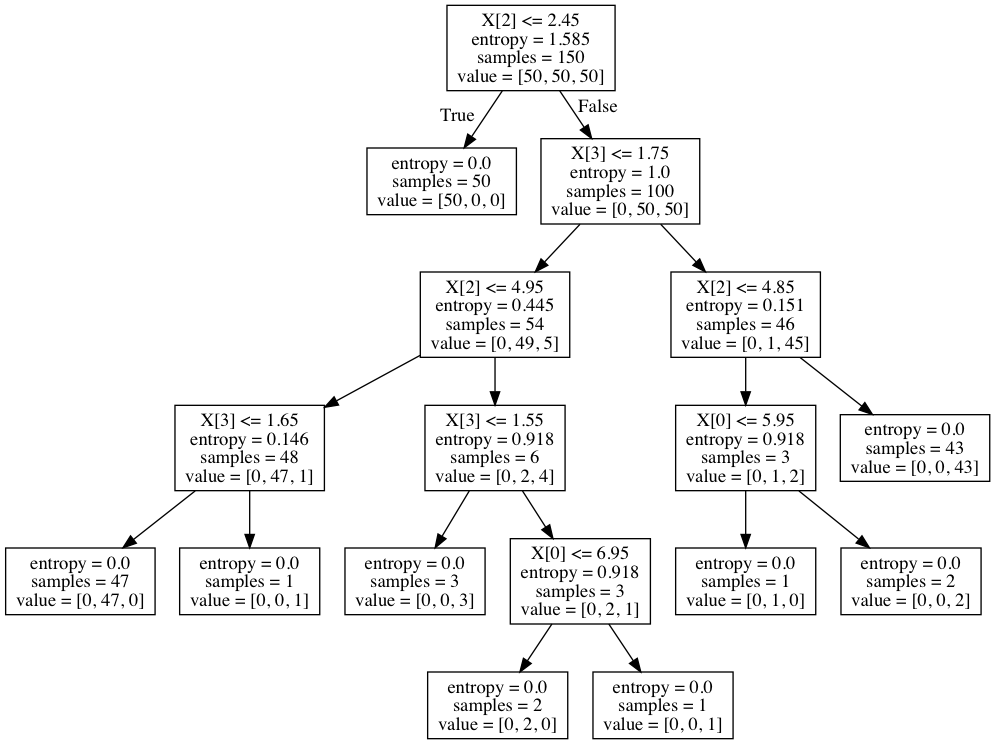

In [13]:
from pydotplus import graphviz
from IPython.display import Image  

dot_data = tree.export_graphviz(clf)
graph = graphviz.graph_from_dot_file("iris.dot")
Image(graph.create_png())

# 方法二：使用 pydotplus 直接生成 iris.pdf

In [14]:
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()
tree.export_graphviz(clf,
        out_file=dot_data,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        filled=True, rounded=True,
        impurity=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("iris.pdf")

True

# 方法三：直接在 jupyter notebook 中生成

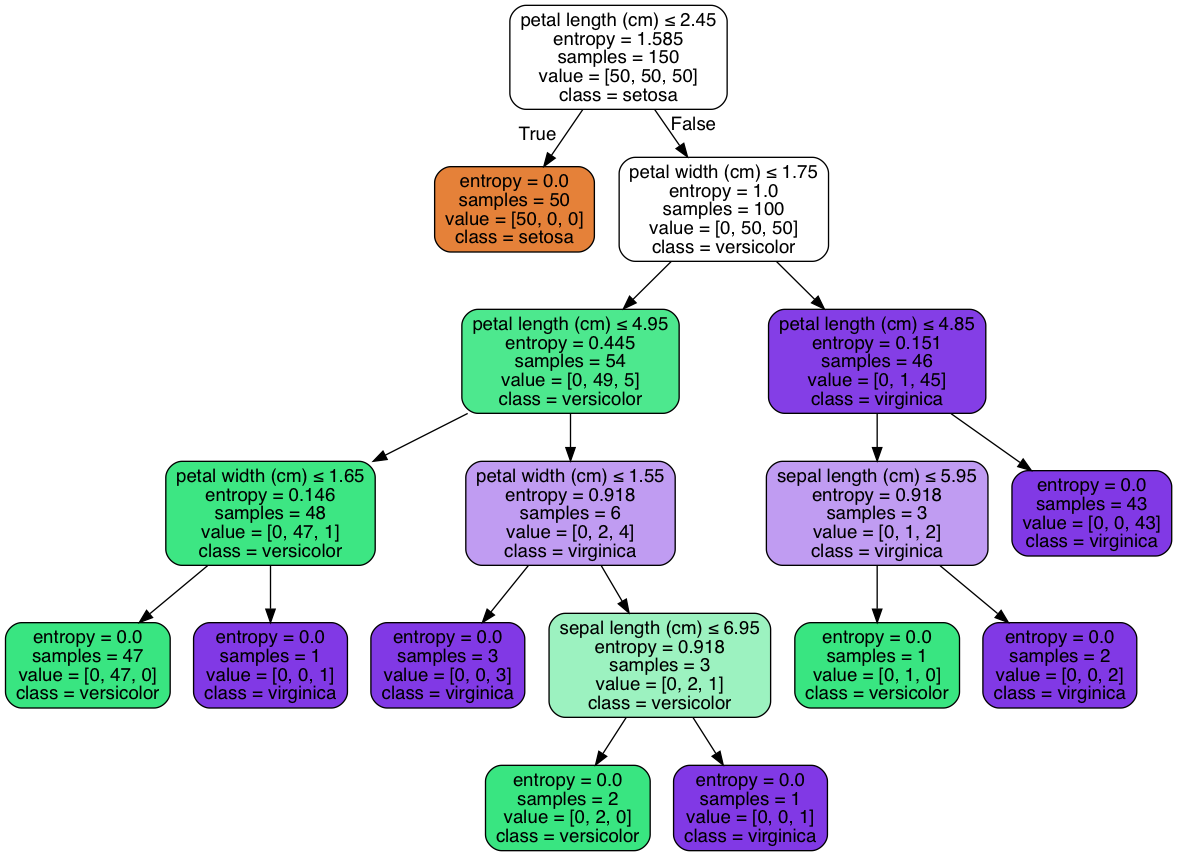

In [15]:
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO

dot_data = StringIO()

# tree.export_graphviz(clf,
#         out_file=dot_data,
#         feature_names=iris.feature_names,
#         class_names=iris.target_names,
#         filled=True, rounded=True,
#         impurity=False)  

tree.export_graphviz(clf, out_file=dot_data, 
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())